In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

bc_dataset = load_breast_cancer()
print("Clefs du dataset : {}".format(bc_dataset.keys()))

Clefs du dataset : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("Forme de l'ensemble : {}".format(bc_dataset.data.shape))

Forme de l'ensemble : (569, 30)


In [3]:
print("Nombre d'échantillons par classes : \n{}".format({
    n:v for n,v in zip(bc_dataset.target_names, np.bincount(bc_dataset['target']))
}))

Nombre d'échantillons par classes : 
{'malignant': 212, 'benign': 357}


In [5]:
print("Nom des paramètres : \n{}".format(bc_dataset['feature_names']))

Nom des paramètres : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


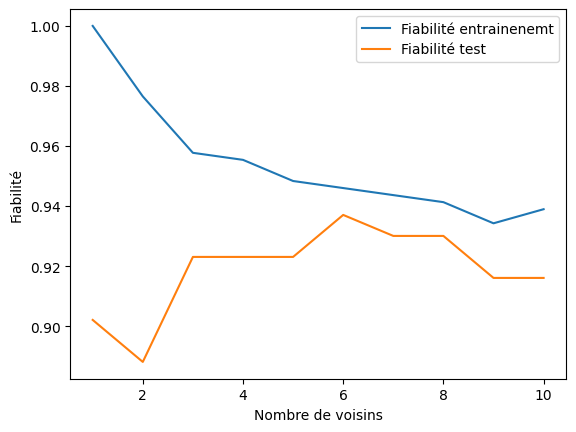

In [14]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_learn, X_test, y_learn, y_test = train_test_split(
    bc_dataset['data'],bc_dataset['target'],
    stratify=bc_dataset['target'], random_state=66)

for n_neighbors in neighbors_settings:
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_learn,y_learn)
    training_accuracy.append(classifier.score(X_learn,y_learn))
    test_accuracy.append(classifier.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Fiabilité entrainenemt")
plt.plot(neighbors_settings, test_accuracy, label="Fiabilité test")
plt.xlabel("Nombre de voisins")
plt.ylabel("Fiabilité")
plt.legend()